In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [2]:
data = pd.read_csv('../input/pulsar_stars.csv')

In [3]:
data.head(3)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 Mean of the integrated profile                  17898 non-null float64
 Standard deviation of the integrated profile    17898 non-null float64
 Excess kurtosis of the integrated profile       17898 non-null float64
 Skewness of the integrated profile              17898 non-null float64
 Mean of the DM-SNR curve                        17898 non-null float64
 Standard deviation of the DM-SNR curve          17898 non-null float64
 Excess kurtosis of the DM-SNR curve             17898 non-null float64
 Skewness of the DM-SNR curve                    17898 non-null float64
target_class                                     17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [5]:
data.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


In [6]:
# Check nan values
data.isna().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

Class repartition: 
 0    16259
1     1639
Name: target_class, dtype: int64


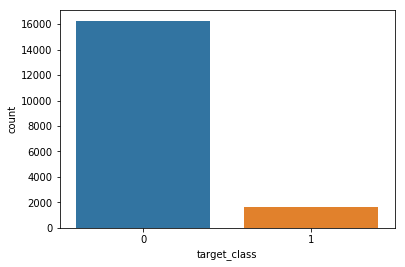

In [7]:
print('Class repartition: \n',data['target_class'].value_counts())
sns.countplot(data['target_class'])

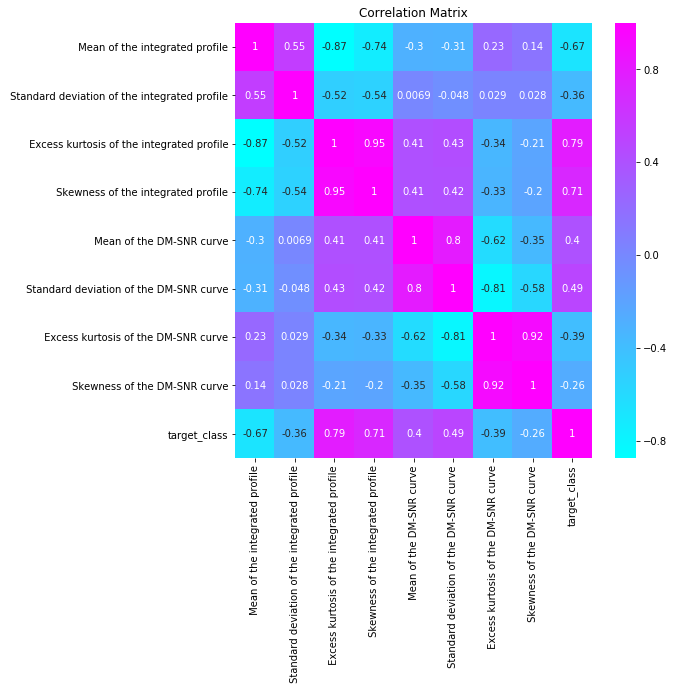

In [8]:
# Get correlation matrix
correl = data.corr()

plt.figure(figsize=(8,8))
plt.title('Correlation Matrix')
sns.heatmap(correl,annot=True,cmap='cool')

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


<Figure size 720x720 with 0 Axes>

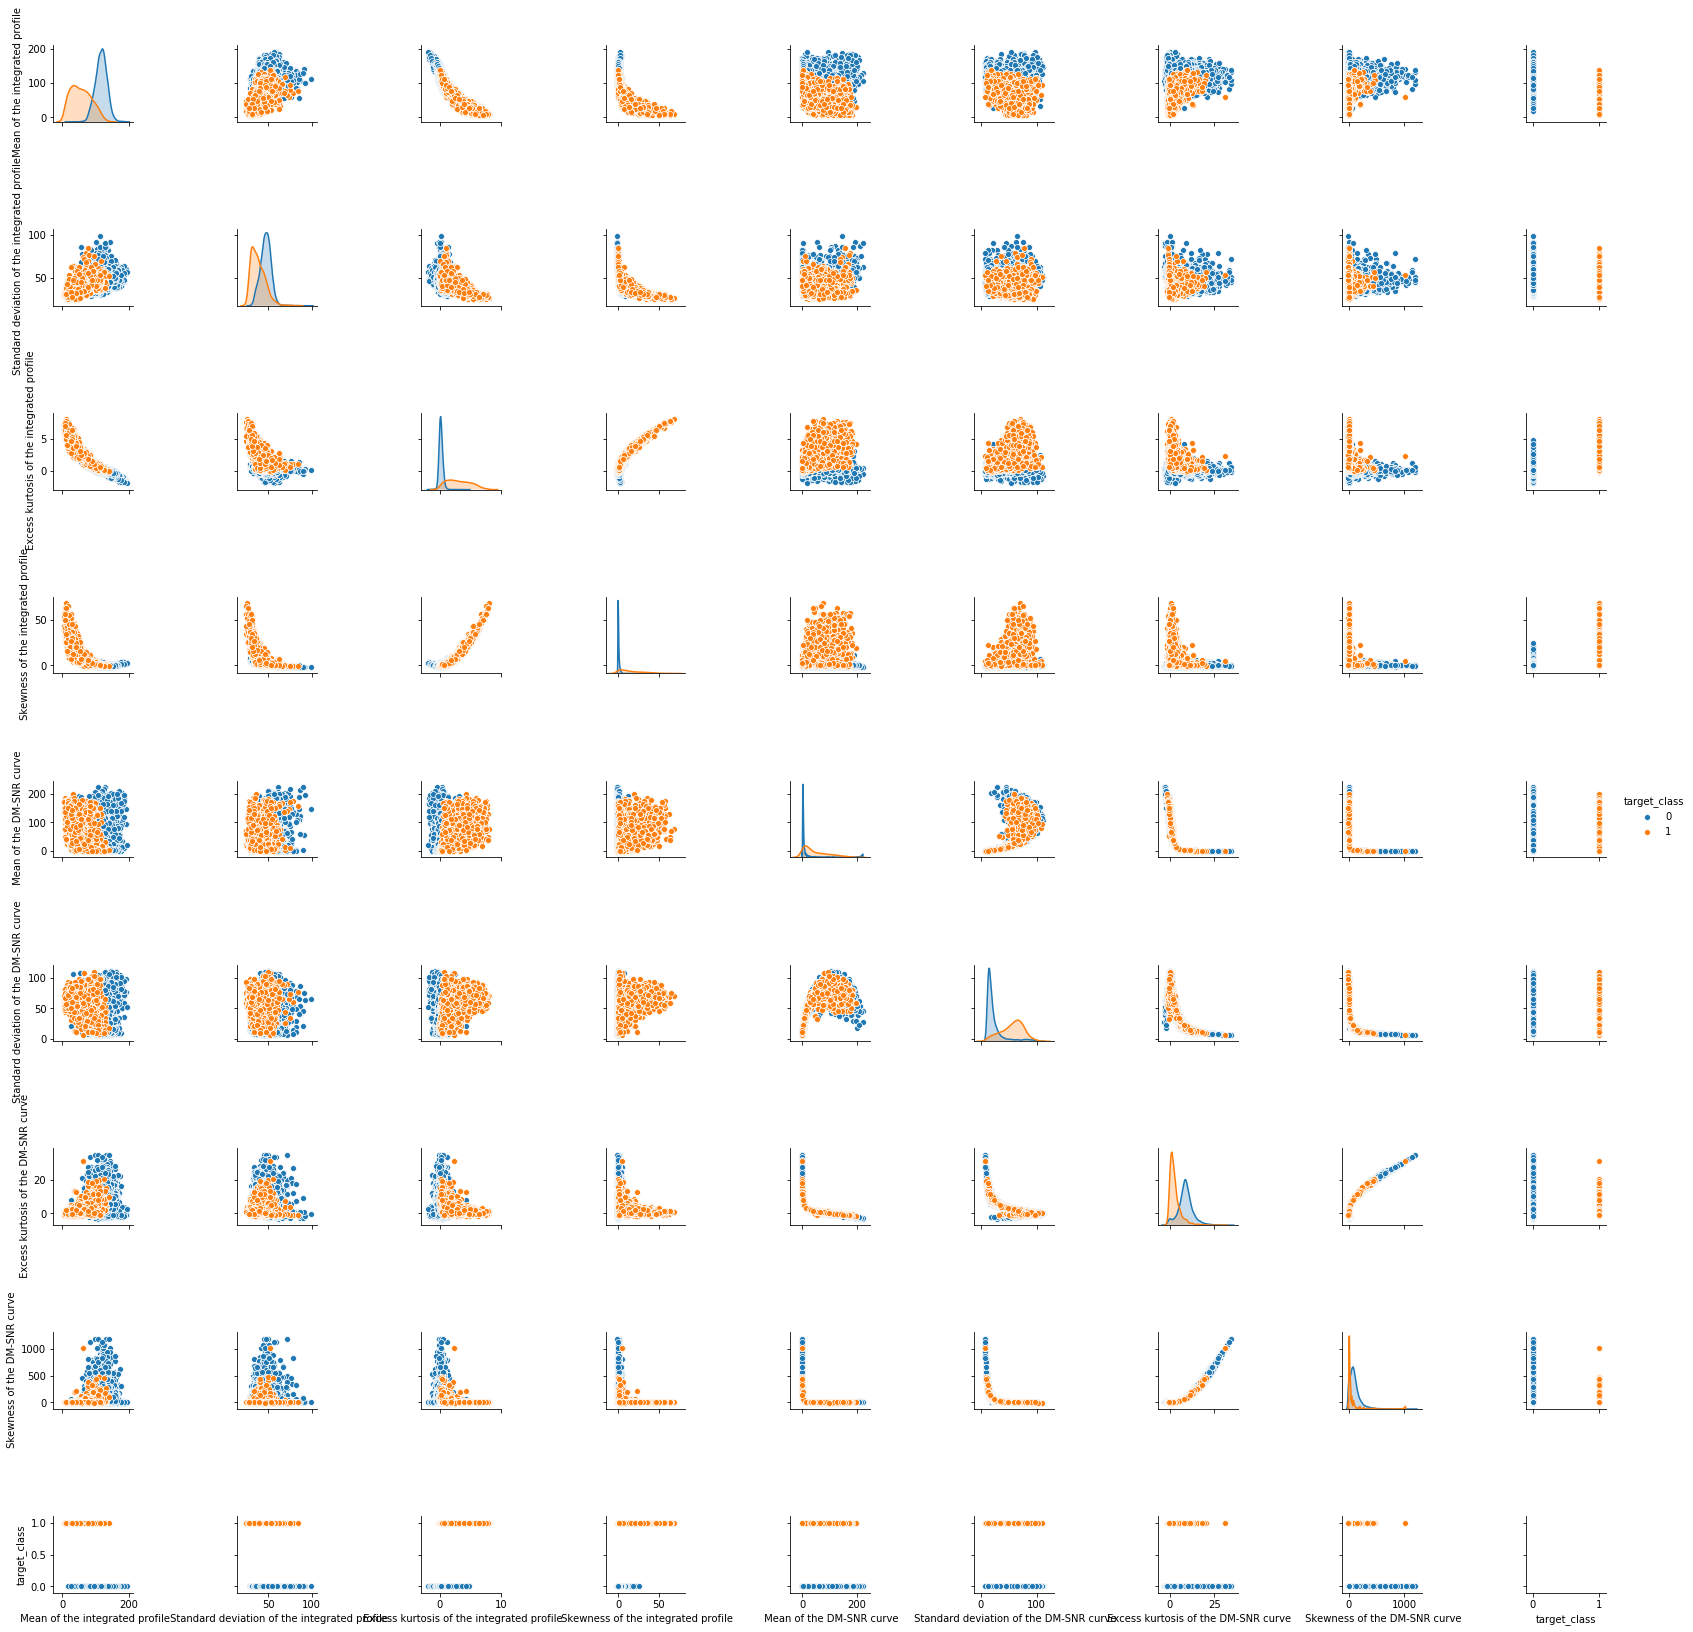

In [9]:
plt.figure(figsize=(10,10))
sns.pairplot(data, hue='target_class')

In [10]:
X = data.drop('target_class', axis=1)
y = data['target_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
def model_eval(algo,m_type):
    
    # Fit model
    algo.fit(X_train, y_train)
    
    # Compute accuracy on test set
    accuracy = algo.score(X_test,y_test)
    
    # Prediction on test set
    y_pred = algo.predict(X_test)
    
    if m_type=='coef':
        ft = algo.coef_.ravel()
        
    elif m_type=='feature':
        ft = algo.feature_importances_
    
    print('-----------------------------------------------------------')
    print('Model evaluation')
    print('-----------------------------------------------------------')
    print(algo,'\n')
    
    print('Accuracy:', accuracy, '\n')
    
    # Compute recall precision & f1-score
    print('Classification report: \n',classification_report(y_test, y_pred))
    
    # Plot confusion Matrix
    plt.figure(figsize=(30,8))
    plt.subplot(131)
    plt.title('Confusion Matrix')
    sns.heatmap(confusion_matrix(y_test, y_pred),annot=True)
    
    if m_type=='coef' or m_type=='feature':
        
        plt.subplot(132)
        plt.title('Features importances')
        df = pd.DataFrame(ft, X.columns).reset_index()
        df = df.rename(columns={'index':'features', 0:'coef'})
        df = df.sort_values(by='coef', ascending=True)
        sns.barplot(x='coef', y='features', data=df, palette='pastel')
        
    else:    
        return algo
    
    plt.tight_layout()

## Gradient boosting

-----------------------------------------------------------
Model evaluation
-----------------------------------------------------------
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False) 

Accuracy: 0.9798882681564246 

Classification report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3261
           1       0.91      0.86      0.88       319

   micro avg       0.98      0.98      0.98      3580
   macro avg       0.95      0.92      0.9

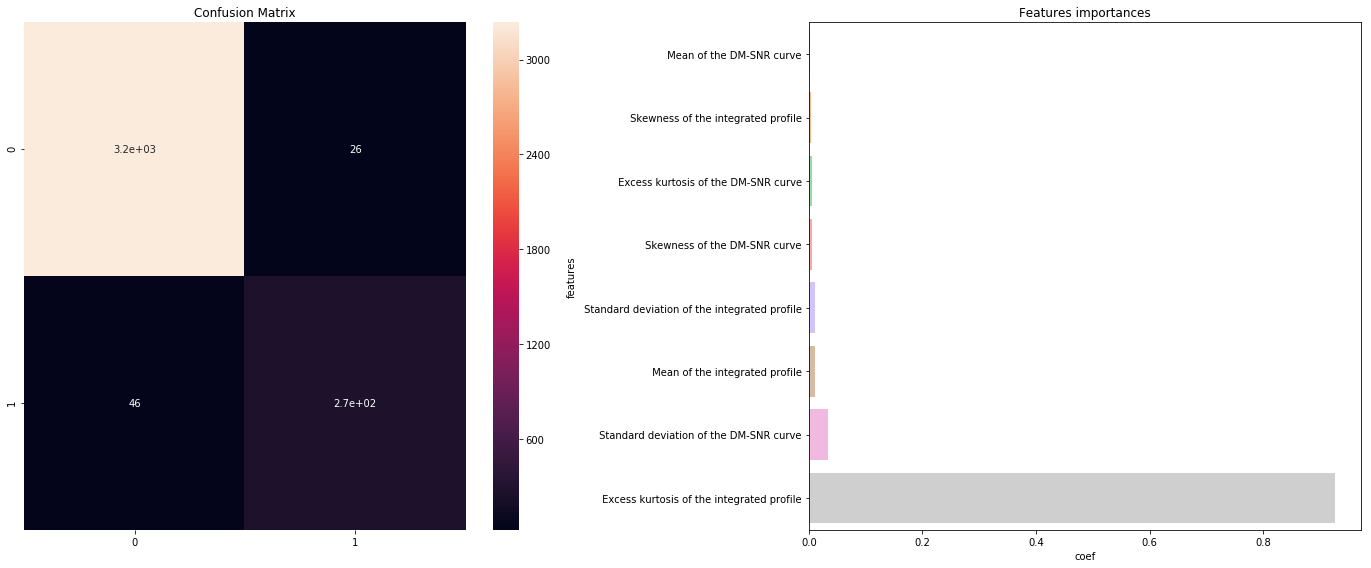

In [12]:
gbc = GradientBoostingClassifier()
model_eval(gbc,'feature')

## Adaboost

-----------------------------------------------------------
Model evaluation
-----------------------------------------------------------
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None) 

Accuracy: 0.979608938547486 

Classification report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3261
           1       0.95      0.81      0.88       319

   micro avg       0.98      0.98      0.98      3580
   macro avg       0.97      0.90      0.93      3580
weighted avg       0.98      0.98      0.98      3580



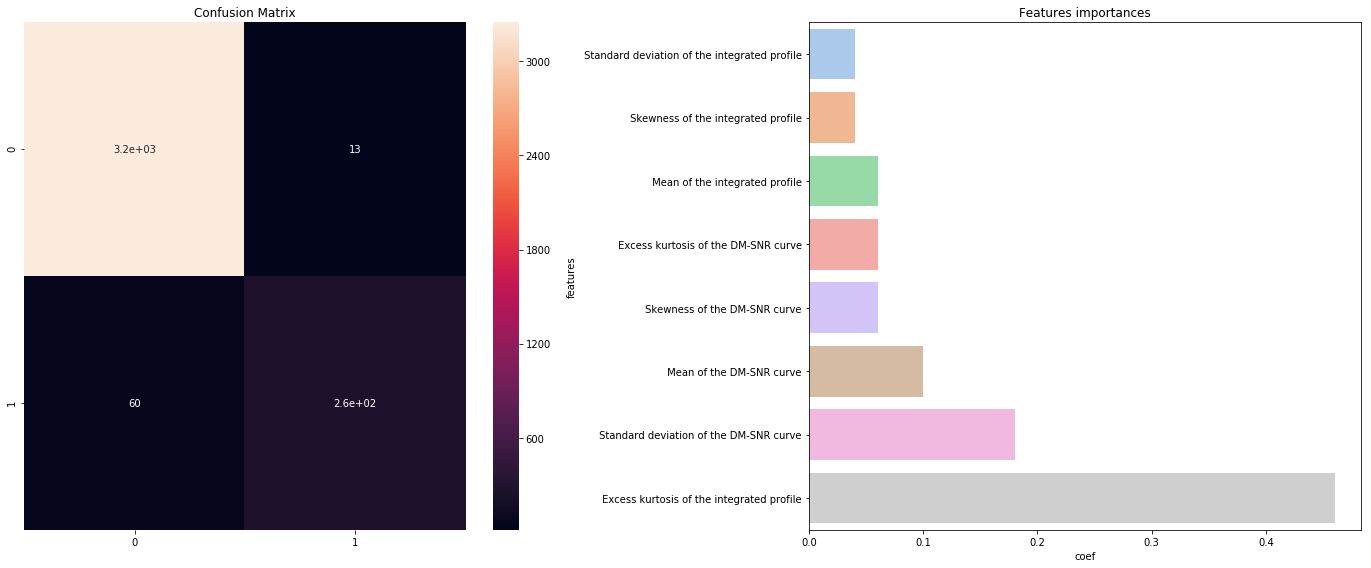

In [13]:
abc = AdaBoostClassifier()
model_eval(abc, 'feature')

## SVC

-----------------------------------------------------------
Model evaluation
-----------------------------------------------------------
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False) 

Accuracy: 0.9815642458100559 

Classification report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3261
           1       0.96      0.83      0.89       319

   micro avg       0.98      0.98      0.98      3580
   macro avg       0.97      0.91      0.94      3580
weighted avg       0.98      0.98      0.98      3580



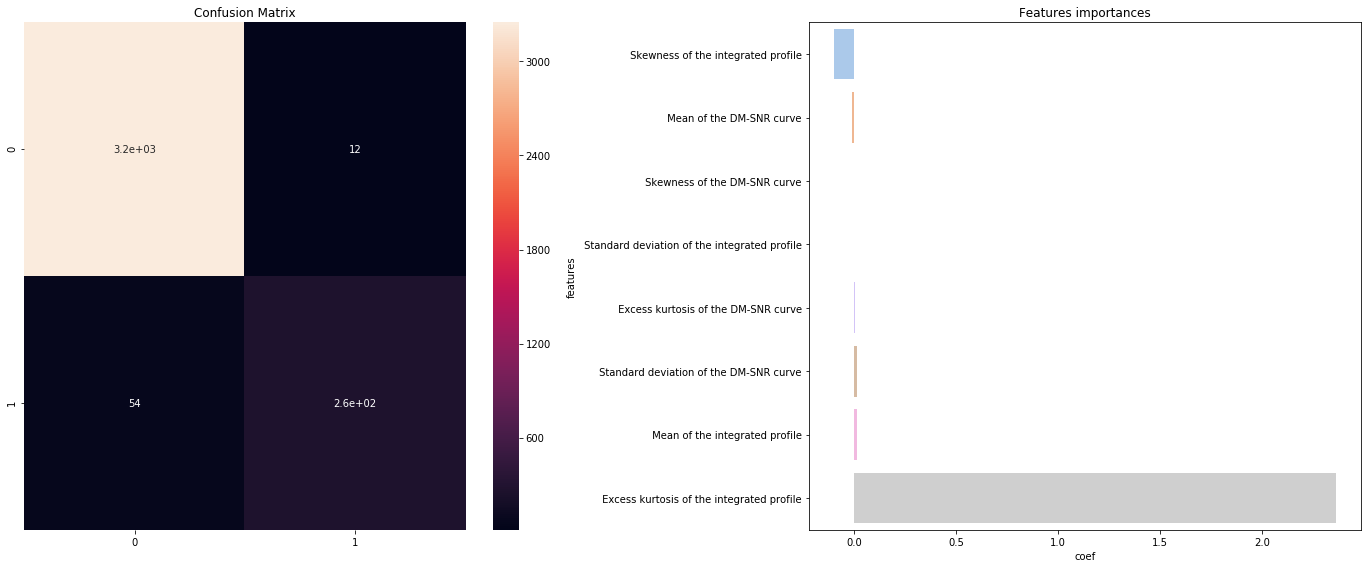

In [14]:
svc = SVC(kernel='linear')
model_eval(svc, 'coef')

## Xgboost

-----------------------------------------------------------
Model evaluation
-----------------------------------------------------------
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1) 

Accuracy: 0.9818435754189944 

Classification report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3261
           1       0.93      0.86      0.89       319

   micro avg       0.98      0.98      0.98      3580
   macro avg       0.96      0.93      0.94      3580
weighted avg       0.98      0.98      0.98      3580



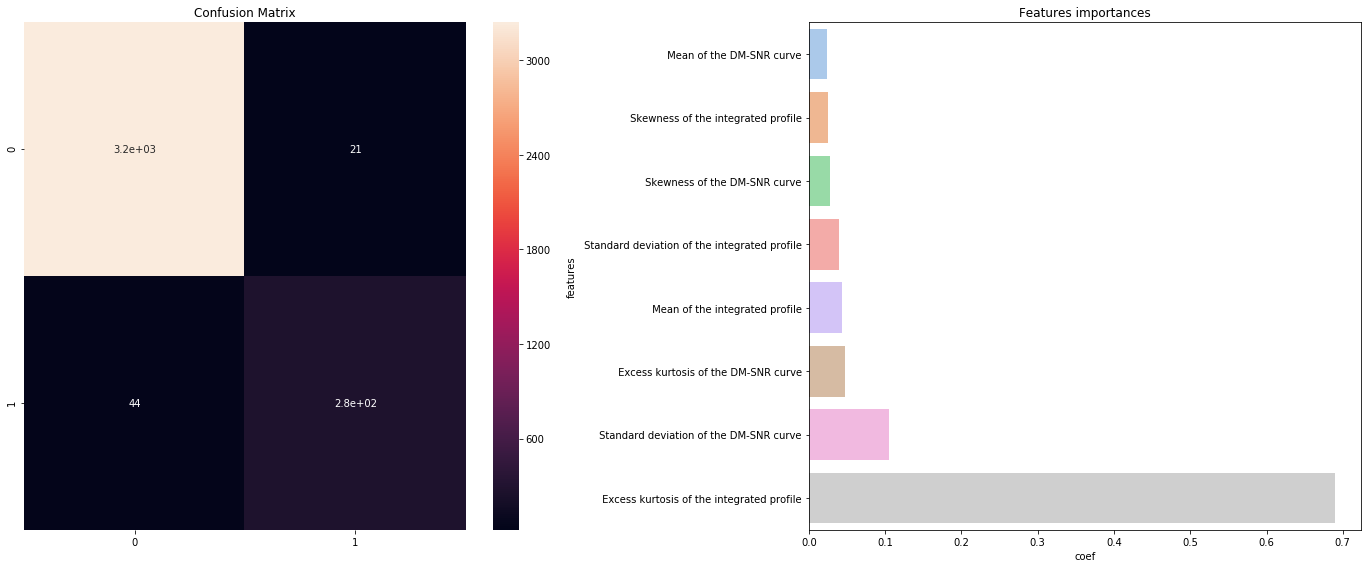

In [15]:
xgb = XGBClassifier()
model_eval(xgb, 'feature')

## Random forest

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


-----------------------------------------------------------
Model evaluation
-----------------------------------------------------------
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) 

Accuracy: 0.9807262569832402 

Classification report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      3261
           1       0.93      0.84      0.89       319

   micro avg       0.98      0.98      0.98      3580
   macro avg       0.96      0.92      0.94      3580
weighted avg       0.98      0.98      0.98      3580



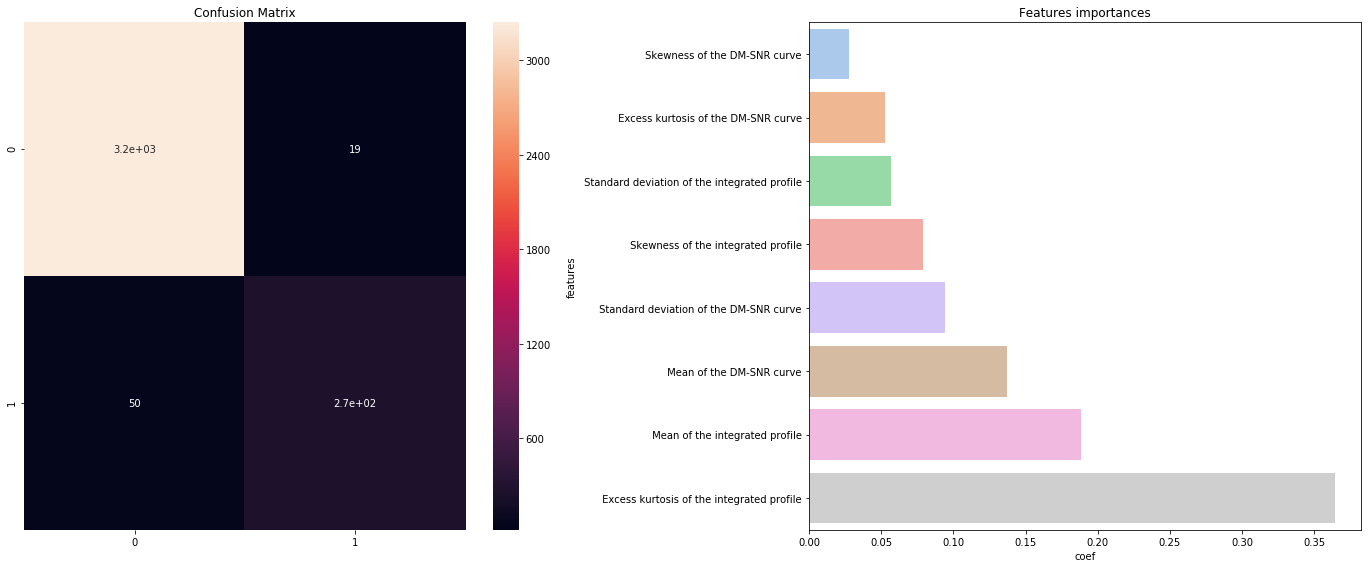

In [16]:
rf = RandomForestClassifier()
model_eval(rf, 'feature')

## Logistic regression

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


-----------------------------------------------------------
Model evaluation
-----------------------------------------------------------
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False) 

Accuracy: 0.9810055865921787 

Classification report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3261
           1       0.95      0.83      0.89       319

   micro avg       0.98      0.98      0.98      3580
   macro avg       0.97      0.91      0.94      3580
weighted avg       0.98      0.98      0.98      3580



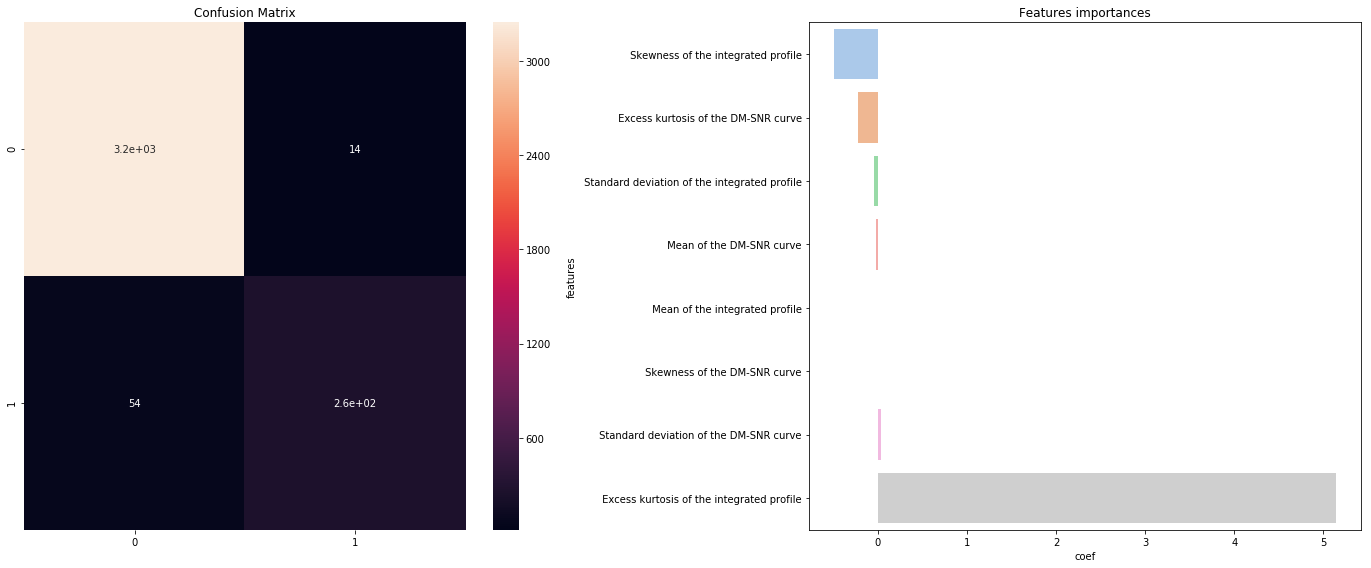

In [17]:
lr = LogisticRegression()
model_eval(lr, 'coef')

## Gaussian NB

-----------------------------------------------------------
Model evaluation
-----------------------------------------------------------
GaussianNB(priors=None, var_smoothing=1e-09) 

Accuracy: 0.95 

Classification report: 
               precision    recall  f1-score   support

           0       0.98      0.96      0.97      3261
           1       0.67      0.85      0.75       319

   micro avg       0.95      0.95      0.95      3580
   macro avg       0.83      0.90      0.86      3580
weighted avg       0.96      0.95      0.95      3580



GaussianNB(priors=None, var_smoothing=1e-09)

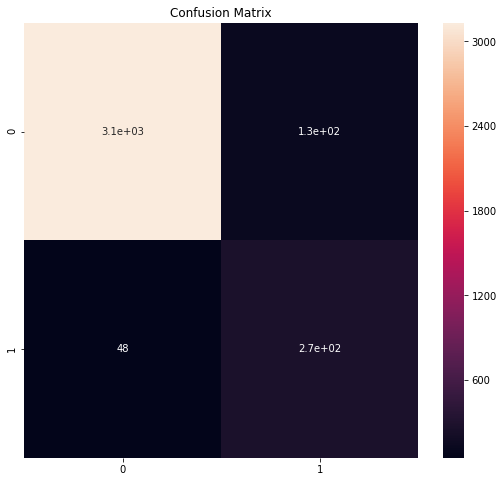

In [18]:
gnb = GaussianNB()
model_eval(gnb, 'none')